In [2]:
import os
from os import listdir
from os.path import isfile, join
import json
from itertools import chain
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import datetime

participantCode = "AP-001"
mypath = "D:\\Projects\\Thesis\\Main-study\\ThesisDataProcessing\\Participants\\" + participantCode

print(listdir(mypath))

['AP-001 - Easy - PWA accel - 1637577236782_1.json', 'AP-001 - Easy - PWA accel - 1637577315956_2.json', 'AP-001 - Easy - PWA accel - 1637577394612_3.json', 'AP-001 - Hard - PWA accel - 1637577738301_1.json', 'AP-001 - Hard - PWA accel - 1637577816969_2.json', 'AP-001 - Hard - PWA accel - 1637577895471_3.json', 'AP-001 - Medium - PWA accel - 1637577489952_1.json', 'AP-001 - Medium - PWA accel - 1637577568585_2.json', 'AP-001 - Medium - PWA accel - 1637577647647_3.json']


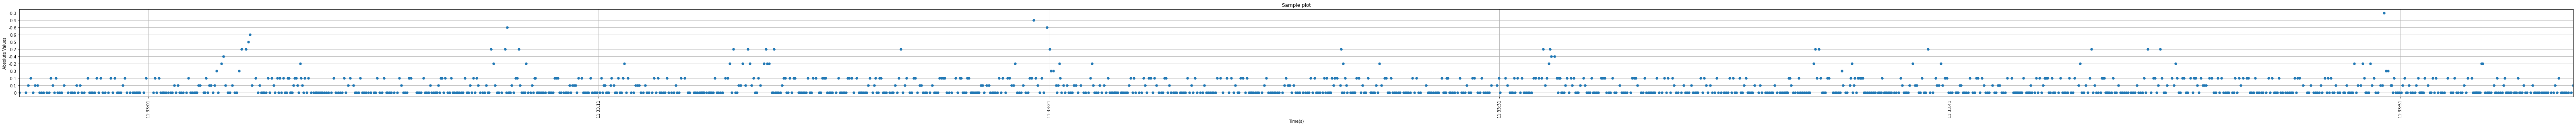

In [3]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# print(onlyfiles)

easySensorValues = []
easyTimeValues = []
mediumSensorValues = []
hardSensorValues = []
easyImages = []
mediumImages = []
hardImages = []

for file in onlyfiles:
    f = open(os.path.join(mypath, file), "r")
    data = json.load(f)
    sensorValues = []
    timeValues = []
    if "easy" in data:
        for i in data["easy"]:
            sensorValues.append(i["sensorValue"])
            timeValues.append(
                datetime.datetime.fromtimestamp(i["time"] / 1000.0))
            easyImages.append(i["imageData"])
    easyTimeValues.append(timeValues)
    easySensorValues.append(sensorValues)
    if "medium" in data:
        for i in data["medium"]:
            sensorValues.append(i["sensorValue"])
            mediumImages.append(i["imageData"])
    mediumSensorValues.append(sensorValues)
    if "hard" in data:
        for i in data["hard"]:
            sensorValues.append(i["sensorValue"])
            hardImages.append(i["imageData"])
    hardSensorValues.append(sensorValues)

t = np.arange(0.0, 2.0, 0.01)


def splitAxis(arrayToSplit):
    x = []
    y = []
    z = []

    for values in arrayToSplit:
        holder = values.split(",")
        x.append(holder[0])
        y.append(holder[1])
        z.append(holder[2])

    return [x, y, z]


x, y, z = splitAxis(easySensorValues[0])

fig, ax = plt.subplots()
plt.plot_date(easyTimeValues[0], x, fmt='H')
plt.setp(plt.gca().xaxis.get_majorticklabels(),
         'rotation', 90)
plt.gca().xaxis.set_major_locator(matplotlib.dates.SecondLocator(interval=10))
N = len(easyTimeValues[0]) / 2
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])


# ax.set_xlim([easyTimeValues[0][0], easyTimeValues[0][15]])
# ax.set_xticks(np.arange(0, 1, step=0.2))
# fig.subplots_adjust(bottom=0.900, top=1)
# print(x)
# print(easyTimeValues[0])
# ax.plot(easyTimeValues[0], x, label="x values")
# ax.plot(easyTimeValues[0], y, label="y values")
# ax.plot(easyTimeValues[0], z, label="z values")
ax.set(xlabel="Time(s)", ylabel="Absolute Values", title="Sample plot")
ax.grid()

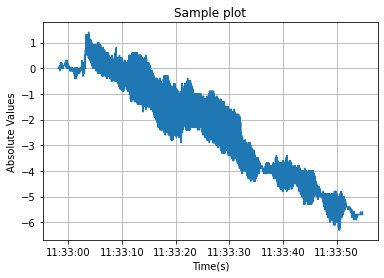

In [4]:
xline = [0]
yline = [0]
zline = [0]

fig1, ax1 = plt.subplots()

for f in range(len(x)):
    xline.append(xline[f - 1] + float(x[f]))
for f in range(len(y)):
    yline.append(yline[f - 1] + float(y[f]))
for f in range(len(x)):
    zline.append(zline[f - 1] + float(z[f]))

timeValuesHolder = easyTimeValues[0]
# timeValuesHolder.append(datetime.datetime.now())

if (len(xline) > len(timeValuesHolder)):
    lowerIndex = len(timeValuesHolder)
    upperIndex = len(xline)
    while (lowerIndex < upperIndex):
        timeValuesHolder.append(timeValuesHolder[lowerIndex - 1])
        lowerIndex += 1
else:
    lowerIndex = len(xline)
    upperIndex = len(timeValuesHolder)
    while (lowerIndex < upperIndex):
        xline.append(xline[lowerIndex - 1])
        lowerIndex += 1



ax1.plot(timeValuesHolder, xline, label="x values")
# ax1.plot(timeValuesHolder, yline, label="y values")
# ax1.plot(timeValuesHolder, zline, label="z values")

ax1.set(xlabel="Time(s)", ylabel="Absolute Values", title="Sample plot")

ax1.grid()

In [ ]:
import seaborn as sns

In [5]:
# import base64
# import cv2
# import numpy as np
# import math

# header, encoded = easyImages[0].split(",", 1)
# encodedStr = base64.b64encode(bytes(easyImages[0], 'utf-8'))

# def from_base64():
#     nparr = np.frombuffer(base64.b64decode(encoded), np.uint8)
#     return cv2.imdecode(nparr, cv2.IMREAD_ANYCOLOR)

# im = from_base64()
# scaling_factor = 0.7

# img = cv2.resize(im, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)
# gray = cv2.cvtColor(~img, cv2.COLOR_BGR2GRAY)

# ret, thresh_gray = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY)
# contours, hierarchy = cv2.findContours(thresh_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# for contour in contours:
#     area = cv2.contourArea(contour)
#     rect = cv2.boundingRect(contour)
#     x, y, width, height = rect
#     radius = 0.25 * (width + height)

#     area_condition = (100 <= area <= 200)
#     symmetry_condition = (abs(1 - float(width)/float(height)) <= 0.2)
#     fill_condition = (abs(1 - (area / (math.pi * math.pow(radius, 2.0)))) <= 0.3)

#     if area_condition and symmetry_condition and fill_condition:
#         cv2.circle(img, (int(x + radius), int(y + radius)), int(1.3*radius), (0,180,0), -1)

# cv2.imshow('Pupil Detector', img)
# c = cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.imwrite('myLoadedfile.jpeg', im)
# plt.figure()
# plt.imshow(gray)